# Homework 3 (100 points)

The goal of this homework is to practice techniques relating to SVD.

## Exercise 1 (65 points)

a) Fetch the "mnist_784" data and store is as a `.csv` (that way you don't have to fetch it every time - which takes about 30s). (4 points)

In [5]:
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)

samples_num = len(X)

import csv

df = open('mnist_784.csv', 'w', encoding='utf-8')
df_writer = csv.writer(df)
for i in range(samples_num):
    df_writer.writerow((X[i], y[i]))

df.close()

b) Plot the singular value plot for a single example of the 0 digit (5 points)

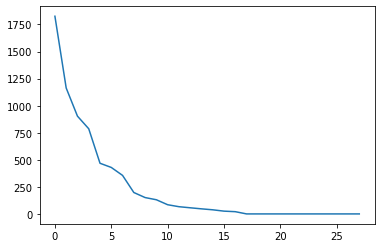

In [76]:
import pandas as pd
import numpy as np

df = pd.read_csv('mnist_784.csv')
for i in range(samples_num):
    if y[i] == '0':
        img0 = X[i]
        #print(i, [i])
        break
        
img0 = img0.reshape(28, 28)
U, s, V = np.linalg.svd(img0)
S = np.diag(s)
plt.plot(s)

c) By setting some singular values to 0, plot the approximation of the 0 digit next to the original digit. (5 points)

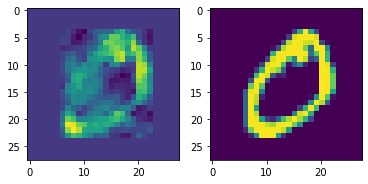

In [85]:
p = 0.3 # the possibility of a sigular value is set to 0
zero_matrix = np.random.randint(0, 10, (28, ))
zero_bool = zero_matrix > 10 * p
S1 = np.diag(s)
for i in range(28):
    if zero_bool[i] == False:
        S1[i] = 0
img1 = np.matmul(np.matmul(U, S1), V)
plt.figure ()
plt.subplot ( 1, 2, 1)
plt.imshow (img1)
plt.subplot ( 1, 2, 2)
plt.imshow (img0)
plt.show ()

d) Consider the entire dataset as a matrix. Perform SVD and store the dataset approximation in a new `.csv` file. Explain why / how you chose a particular rank. Note: you may not be able to run this on the entire dataset in a reasonable amount of time so you may take a small random sample for this and the following questions. (10 points)

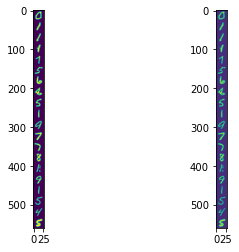

In [199]:
selected_num = 20  # the number of random samples
selected_index = np.random.randint(0, samples_num, selected_num)
entire_matrix = np.zeros((28 * selected_num, 28))
rank = 10  # digit 0~9 , the number of features is 10
imgd1 = []
labels = []
for i in range(selected_num):
    img = X[selected_index[i]]
    labels.append(y[selected_index[i]])
    imgd1.append(img)
    entire_matrix[i*28:(i+1)*28][:] = img.reshape((28, 28))
U_d, s_d, V_d = np.linalg.svd(entire_matrix)
S_d = np.zeros((entire_matrix.shape[0], entire_matrix.shape[1]))
S_d[:entire_matrix.shape[1], :entire_matrix.shape[1]] = np.diag(s_d)
#restore_matrix = np.matmul(np.matmul(U_d, S_d), V_d)
restore_matrix = np.matmul(np.matmul(U_d[:, :rank], S_d[:rank]), V_d)
dfd = open('entire_SVD.csv', 'w', encoding='utf-8')
dfd_writer = csv.writer(dfd)
imgd2 = []
for i in range(selected_num):
    img = restore_matrix[i*28:(i+1)*28].flatten()
    imgd2.append(img)
    dfd_writer.writerow(img)
dfd.close()
plt.figure ()
plt.subplot ( 1, 2, 1)
plt.imshow (entire_matrix)
plt.subplot ( 1, 2, 2)
plt.imshow (restore_matrix)
plt.show ()

e) As in homework 2, using Kmeans on this new dataset, cluster the images from d) using 10 clusters and plot the centroid of each cluster. Note: the centroids should be represented as images. (10 points)

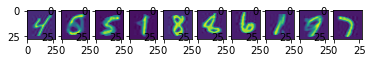

In [209]:
from sklearn.cluster import KMeans
 
kme = KMeans(n_clusters=10).fit(imgd2)
cluster_centers_e = kme.cluster_centers_
labels_e = kme.labels_
plt.figure ()
for i in range(10):
    plt.subplot ( 1, 10, i+1)
    plt.imshow (cluster_centers_e[i].reshape((28, 28)))
plt.show ()

f) Repeat e) on the original dataset (if you used a subset of the dataset, keep using that same subset). Comment on any differences (or lack thereof) you observe. (8 points)

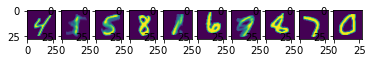

In [210]:
kmf = KMeans(n_clusters=10).fit(imgd1)
cluster_centers_f = kmf.cluster_centers_
labels_f = kmf.labels_
plt.figure ()
for i in range(10):
    plt.subplot ( 1, 10, i+1)
    plt.imshow (cluster_centers_f[i].reshape((28, 28)))
plt.show ()

g) Compare the disagreement distance of the clustering obtained in e) to the true labels, to the disagreement distance of the clustering obtained in f) to the true labels. Comment briefly. (8 points)

In [301]:
def disagreement_dist(P_labels, C_labels):
    C_labels = [ int(x) for x in C_labels ] # transform the char list to int list
    class_num = max(C_labels) + 1
    rec_plabel = [0]*class_num
    rec_clabel = [0]*class_num
    samples_num = len(C_labels)
    for i in range(samples_num):
        rec_plabel[P_labels[i]] += 1
        rec_clabel[C_labels[i]] += 1
    rec_plabel.sort()
    rec_clabel.sort()
    #print(rec_plabel, rec_clabel)
    distance = 0.0
    for i in range(class_num):
        distance += (rec_plabel[i] - rec_clabel[i]) ** 2
    distance = distance ** 0.5
    return distance

distance_e = disagreement_dist(labels_e, labels)
distance_f = disagreement_dist(labels_f, labels)
distance_e, distance_f

(2.8284271247461903, 2.449489742783178)

In [297]:
ls= [1, 3, 2, 4]
max(ls)

4

h) Create a matrix that is the difference between the original dataset and the rank-10 approximation of the dataset. (10 points)

In [ ]:
# The code here is as same as d

i) The largest (using euclidean distance from the origin) rows of the matrix could be considered anomalous data points. Briefly explain why. Plot the 10 images responsible for the 10 largest rows. (5 points)

356.98821345004217


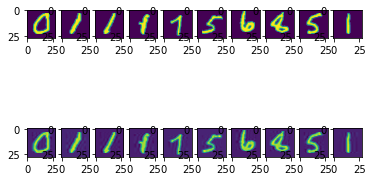

In [227]:
from scipy.spatial import distance

print(distance.euclidean(imgd1[0],imgd2[0]))
ls_distance = []
for i in range(selected_num):
    ls_distance.append(distance.euclidean(imgd1[i],imgd2[i]))
    
max_index = []
for _ in range(10):
    distance = max(ls_distance)
    index = ls_distance.index(distance)
    ls_distance[index] = 0
    max_index.append(index)

for i in range(10):
    plt.subplot ( 2, 10, i+1)
    plt.imshow (imgd1[i].reshape((28, 28)))
for i in range(10):
    plt.subplot ( 2, 10, i+11)
    plt.imshow (imgd2[i].reshape((28, 28)))
plt.show()

## Exercise 2 (35 points)

a) Modify the code below to pick 4 categories of news articles that you think are minimally related (for example `sci.space` and `rec.sport.baseball`). (3 points)

In [242]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer

categories = ['alt.atheism', 'talk.religion.misc','comp.graphics', 'sci.space'] # your categories here
news_data = fetch_20newsgroups(subset='train', categories=categories)

b) Using the `SnowballStemmer`, stem the words in every article (10 points)

In [269]:
# news_data (bunch) : data, target, filenames, DESCR, target_names
article_num = len(news_data.data)
stemmer = SnowballStemmer('english')
stemed_article = []
for i in range(article_num):
    stemed_article.append(stemmer.stem(news_data.data[i]))
news_data.data[0], stemed_article[0]

("From: rych@festival.ed.ac.uk (R Hawkes)\nSubject: 3DS: Where did all the texture rules go?\nLines: 21\n\nHi,\n\nI've noticed that if you only save a model (with all your mapping planes\npositioned carefully) to a .3DS file that when you reload it after restarting\n3DS, they are given a default position and orientation.  But if you save\nto a .PRJ file their positions/orientation are preserved.  Does anyone\nknow why this information is not stored in the .3DS file?  Nothing is\nexplicitly said in the manual about saving texture rules in the .PRJ file. \nI'd like to be able to read the texture rule information, does anyone have \nthe format for the .PRJ file?\n\nIs the .CEL file format available from somewhere?\n\nRych\n\n======================================================================\nRycharde Hawkes\t\t\t\temail: rych@festival.ed.ac.uk\nVirtual Environment Laboratory\nDept. of Psychology\t\t\tTel  : +44 31 650 3426\nUniv. of Edinburgh\t\t\tFax  : +44 31 667 0150\n=============

c) Use the `TfidfVectorizer` on the stemmed articles. Set `min_df` and `max_df` to reasonable numbers and briefly explain your reasoning. Store the resulting dataset into a `.csv` file. (7 points)

In [292]:
dfc = open('tfidf_article.csv', 'w', encoding='utf-8')
dfc_writer = csv.writer(dfc)
tfidf_article = TfidfVectorizer(min_df=0.1, max_df=0.8).fit(stemed_article)
tfidf_result = tfidf_article.transform(stemed_article)
dfc_writer.writerow(tfidf_result)
dfc.close()
words = tdidf_article.get_feature_names(), 
weight_matrix = tfidf_result.toarray()

In [295]:
weight_matrix[:, :1]

array([[0.        ],
       [0.        ],
       [0.29786172],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

d) For rank k ranging from 1 to 25:

1. Reduce the dimensionality of the tfidf vectorized data using a dimension reduction technique discussed in class.
2. Apply Kmeans on the reduced dataset to create 4 clusters
3. Record the disagreement distance between the clustering in 2 and the article category

Then plot the recorded disagreement distance per rank. Comment briefly. (15 points)

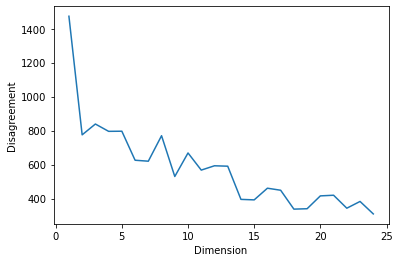

In [302]:
disagreement_distance = []
for k in range(1,25):
    dim_reduced_dataset = weight_matrix[:, :k]
    kmeans = KMeans(n_clusters=4)
    kmeans.fit_predict(dim_reduced_dataset)
    labelsk = kmeans.labels_
    disagreement_distance.append(disagreement_dist(labelsk, news_data.target))

plt.plot(range(1,25), disagreement_distance)
plt.ylabel('Disagreement')
plt.xlabel('Dimension')
plt.show()